In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/DATASET ML/mlsurvey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,Depression,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Unnamed: 27
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,s


Justification:
These libraries are essential for data manipulation (pandas), machine learning model implementation (scikit-learn), and handling numerical operations (numpy).
The dataset is loaded into a pandas DataFrame for easy manipulation and analysis

EDA

In [74]:
print(df.shape)
print("\n",df.describe)
print("\n\nInformation about the dataset",df.info())

(289, 28)

 <bound method NDFrame.describe of            Timestamp  Age  Gender         Country state self_employed  \
0    8/27/2014 11:29   37  Female   United States    IL           NaN   
1    8/27/2014 11:29   44       M   United States    IN           NaN   
2    8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3    8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4    8/27/2014 11:30   31    Male   United States    TX           NaN   
..               ...  ...     ...             ...   ...           ...   
284  8/27/2014 14:10   25    Male          Canada   NaN            No   
285  8/27/2014 14:11   27    Male  United Kingdom   NaN            No   
286  8/27/2014 14:11   26  Female   United States    WA            No   
287  8/27/2014 14:11   18    Male   United States    WA            No   
288  8/27/2014 14:13   38  Female   United States    TX            No   

    family_history Depression work_interfere    no_employees  ...  \
0       


Justification:

To understand the size of the dataset, i.e., the number of rows and columns.
Interpretation: This helps in getting a quick overview of the dataset's dimensions, which is crucial for understanding the scale of data we are working with.
The average age is around 35.74 years, with a standard deviation of 8.33 years.




Purpose: To generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
Interpretation: This provides insights into the basic statistics (mean, standard deviation, min, max, and quartiles) of the numerical columns in the dataset, helping identify potential anomalies or patterns.


Purpose: To get a concise summary of the DataFrame, including the number of non-null entries and the data type of each column.
Interpretation: This is essential for understanding the structure of the dataset, identifying columns with missing values, and knowing the types of data (numerical, categorical, etc.) present in each column.
Shows the number of non-null entries for each column, helping identify columns with missing values.

Value counts of the target variable (in percentage):
 Depression
No     55.363322
Yes    44.636678
Name: count, dtype: float64


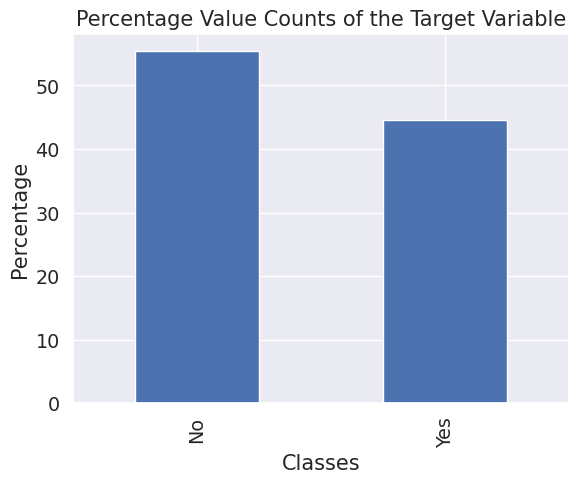

In [75]:
target_column = 'Depression'

# Check the value counts of the target variable
value_counts = df[target_column].value_counts()
percent_counts = (value_counts / value_counts.sum()) * 100
print("Value counts of the target variable (in percentage):\n", percent_counts)

# Visualize the value counts as percentages
percent_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Percentage Value Counts of the Target Variable')
plt.show()

Justification for Visualizing as Percentages:

Clarity: Representing the value counts as percentages helps in understanding the relative proportions of different classes within the 'Depression' column.
Comparison: It allows easy comparison between different classes, showing which classes dominate and which are less frequent.
Insight: This visualization helps in quickly identifying class imbalances or understanding the distribution of the target variable, which is crucial for many machine learning tasks like classification.

DATA CLEANING

In [76]:
#missing data
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().mean().sort_values(ascending=False)*100
missing_data=pd.concat([total,percent],axis=1,keys=['Total no of null values', 'In form of Percent'])
missing_data.head()
print(missing_data)

                           Total no of null values  In form of Percent
Unnamed: 27                                    288           99.653979
comments                                       248           85.813149
state                                          115           39.792388
work_interfere                                  64           22.145329
self_employed                                   18            6.228374
anonymity                                        0            0.000000
obs_consequence                                  0            0.000000
mental_vs_physical                               0            0.000000
phys_health_interview                            0            0.000000
mental_health_interview                          0            0.000000
supervisor                                       0            0.000000
coworkers                                        0            0.000000
phys_health_consequence                          0            0.000000
mental

This approach is essential for data preprocessing tasks as handling missing data effectively is crucial for ensuring the reliability and accuracy of downstream analyses or machine learning models.








In [77]:
#dealing with missing data
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)
df.drop(['self_employed'],axis=1,inplace=True)
df.drop(['Country'], axis= 1,inplace=True)
df.drop(['Unnamed: 27'], axis= 1,inplace=True)


df.isnull().sum().max() #just checking that there's no missing data missing...
df.head(5)



,Age,Gender,family_history,Depression,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,Rarely,25-Jun,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Columns like 'Timestamp', 'comments', 'state','self_employed','Country'and 'Unnamed: 27' are assumed to be irrelevant for the analysis and model training, as they do not contain predictive information for the target variable.

In [78]:
# Replace null values in 'work_interfere' with its mode
if 'work_interfere' in df.columns:
    work_interfere_mode = df['work_interfere'].mode()[0]
    df['work_interfere'].fillna(work_interfere_mode, inplace=True)


# Replace null values in 'anonymity' with its mode
if 'anonymity' in df.columns:
    anonymity_mode = df['anonymity'].mode()[0]
    df['anonymity'].fillna(anonymity_mode, inplace=True)
df.head()

,Age,Gender,family_history,Depression,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,Rarely,25-Jun,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Missing values in categorical columns are filled with the most frequent value (mode) of each column. This is a common imputation technique for categorical data to maintain the integrity of the dataset.

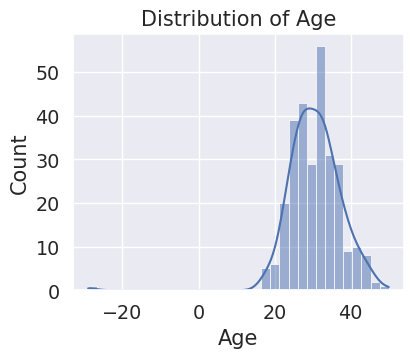

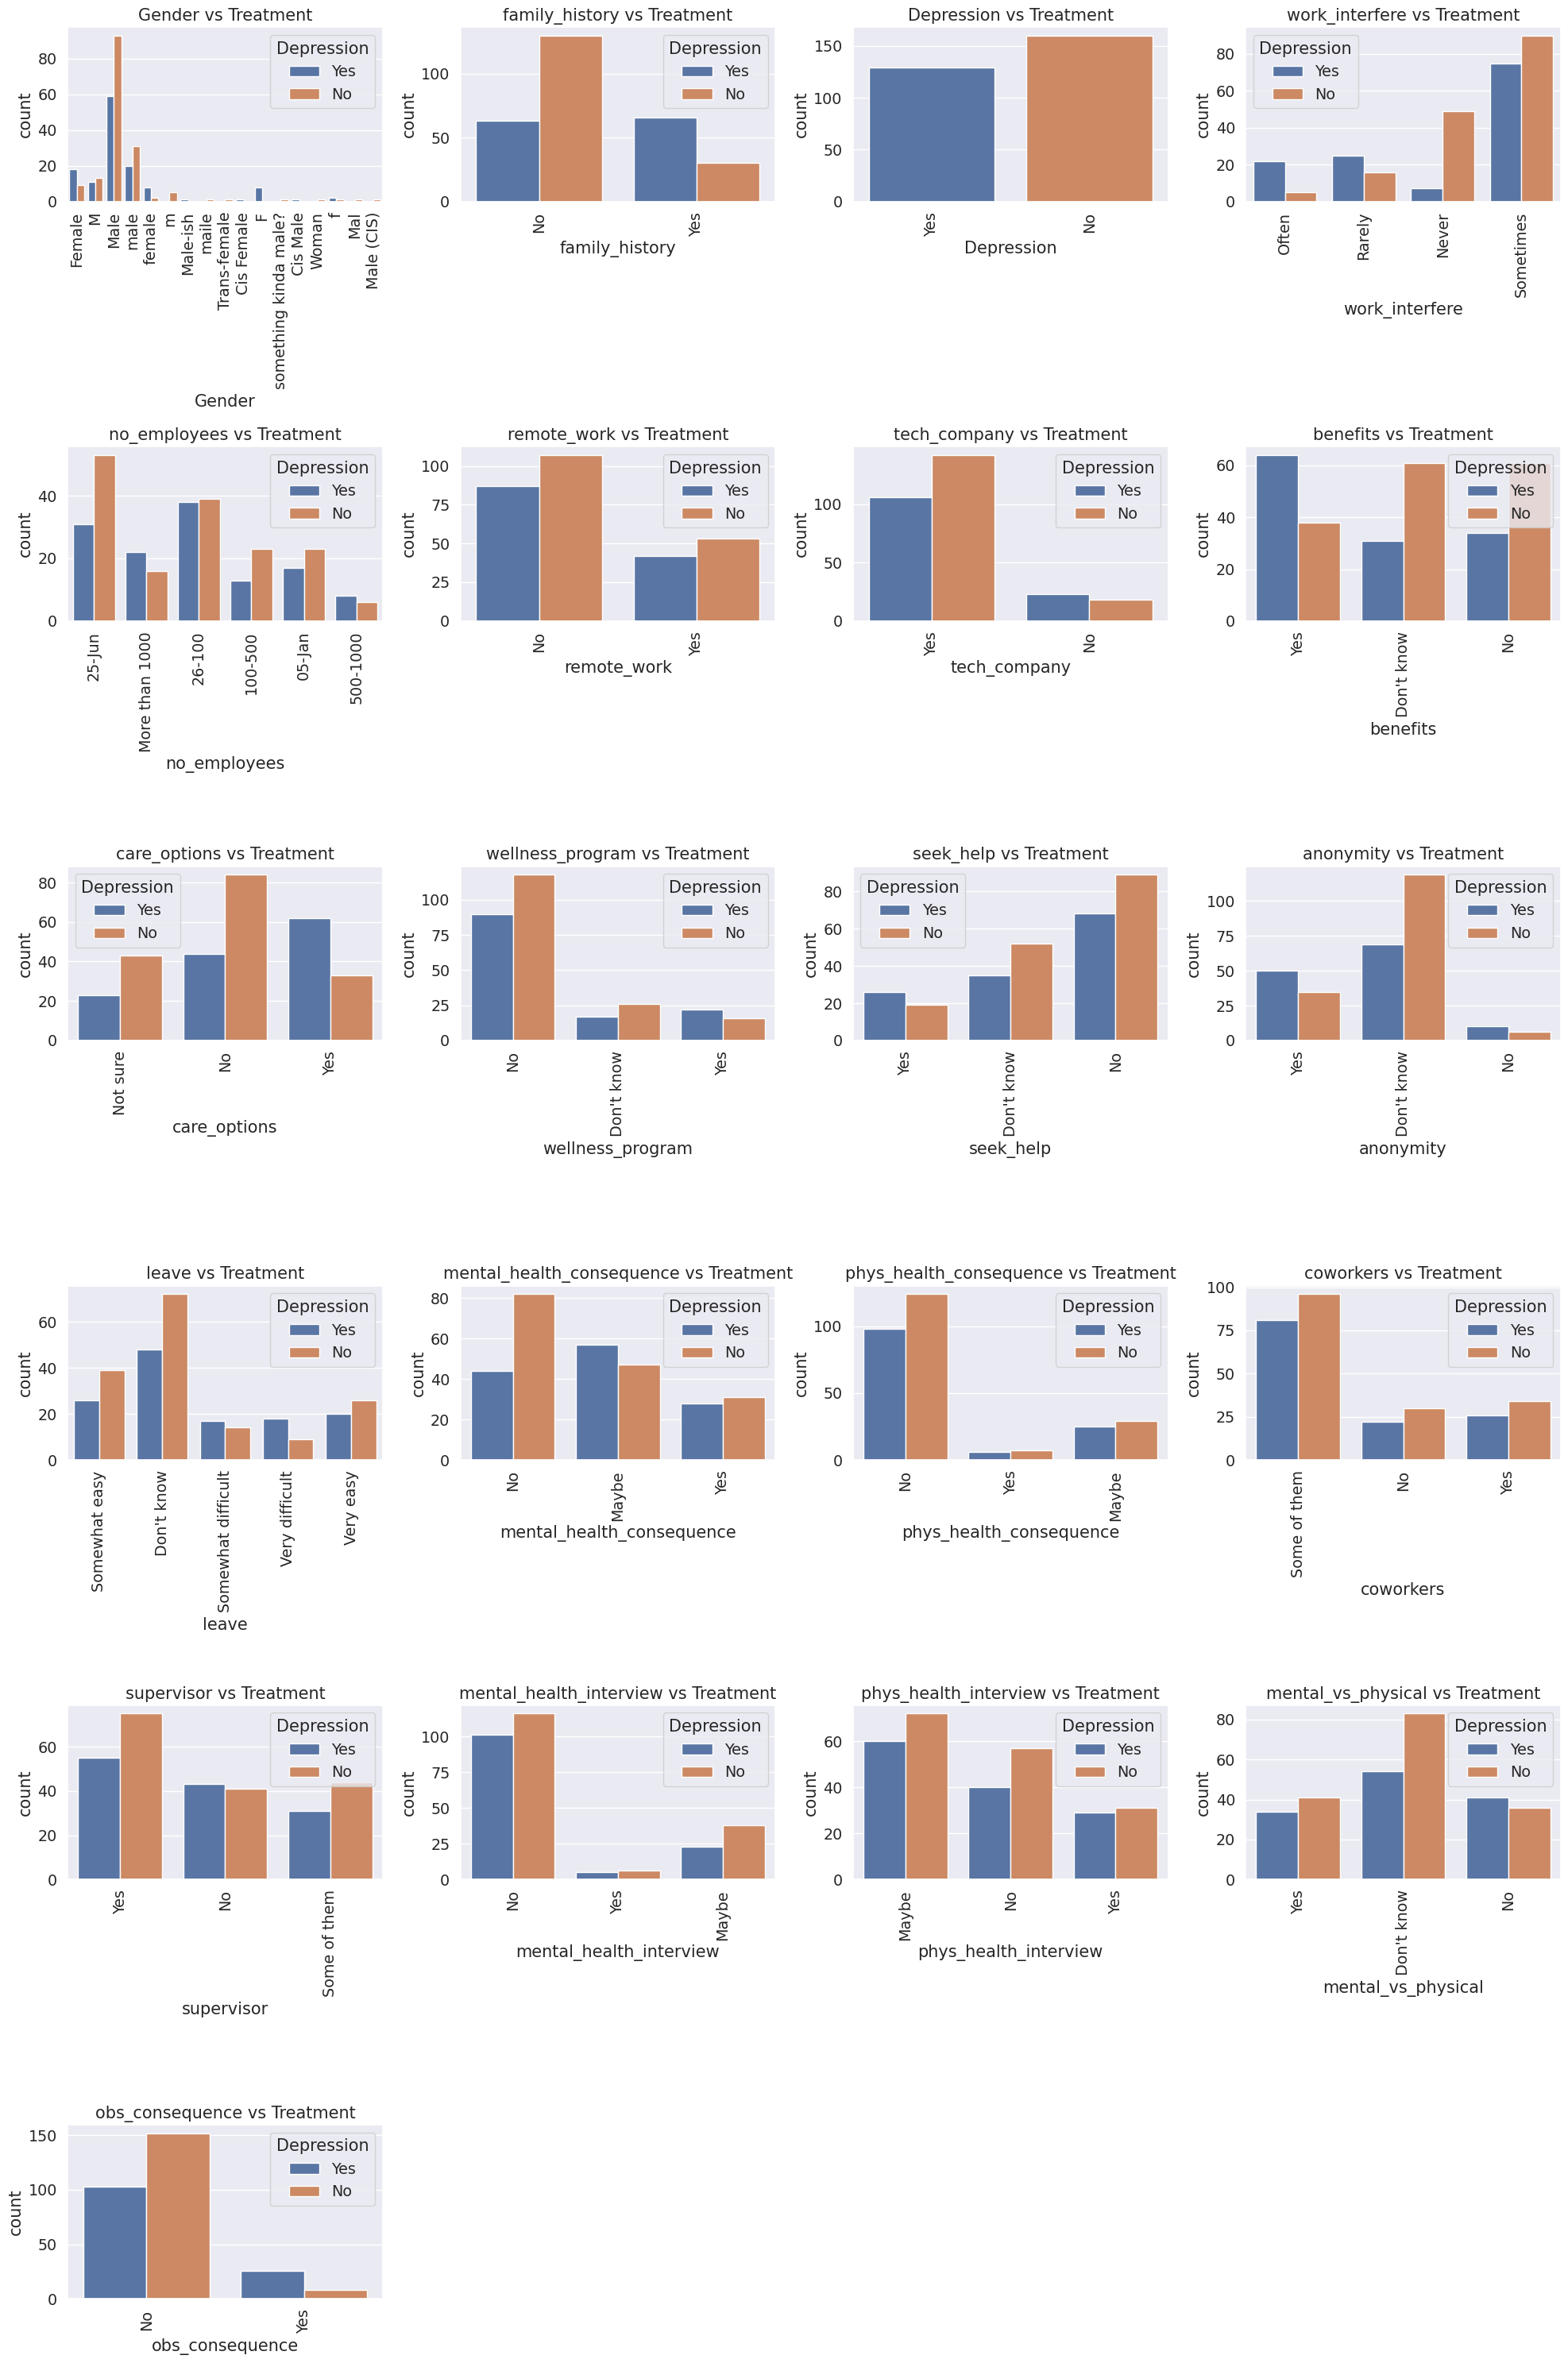

In [79]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize relationships between categorical features and the target variable
categorical_features = df.select_dtypes(include=['object']).columns

# Adjust the number of rows in the subplot grid dynamically
num_plots = len(categorical_features)
num_cols = 4
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

plt.figure(figsize=(20, 5 * num_rows))
for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(data=df, x=feature, hue='Depression')
    plt.title(f'{feature} vs Treatment')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Justification:
Identifying categorical and numerical features is crucial for appropriate preprocessing steps. Different types of data require different preprocessing techniques.

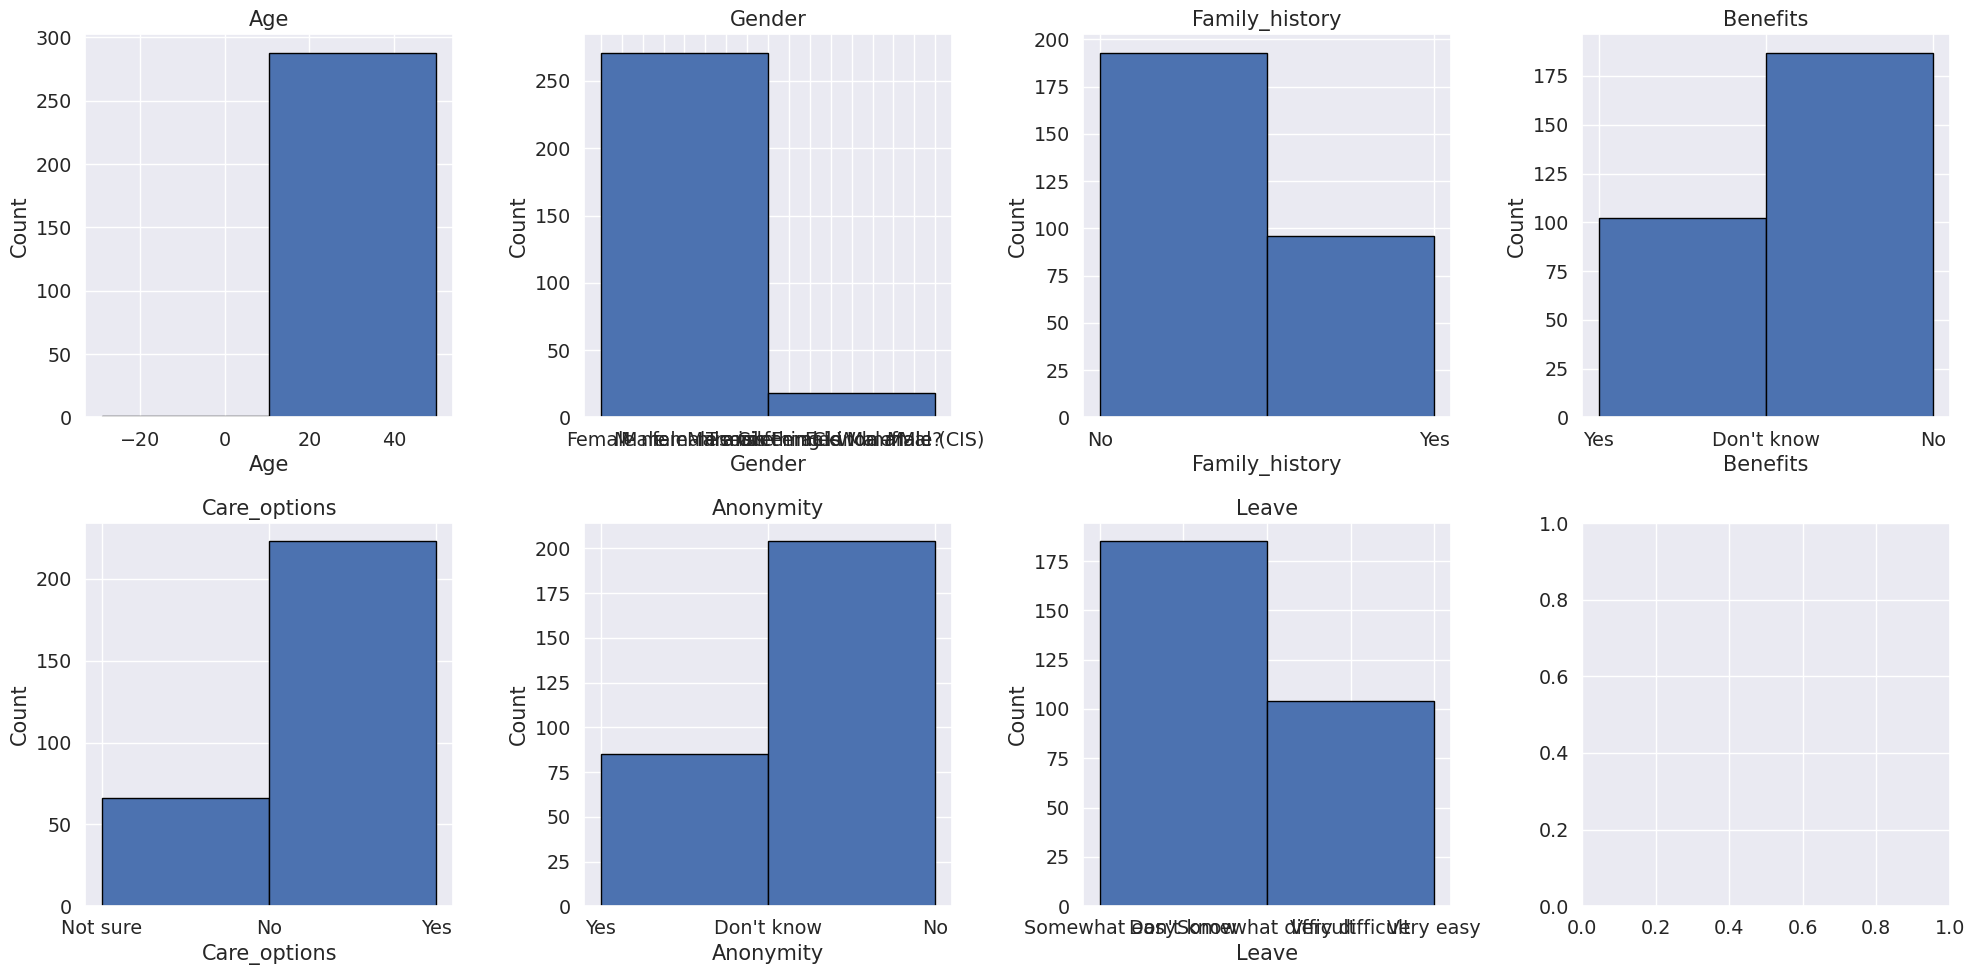

In [80]:
# Define columns to plot
columns = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave']

# Plotting
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    axs[row, col].hist(df[column], bins=10 if column == 'age' else 2, edgecolor='black')
    axs[row, col].set_title(column.capitalize())
    axs[row, col].set_xlabel(column.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder
cat_cols=df.select_dtypes(include=('object')).columns
df[cat_cols]=df[cat_cols].apply(LabelEncoder().fit_transform)
df.head()



,Age,Gender,family_history,Depression,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,3,0,1,1,2,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,44,4,0,0,2,5,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,6,0,0,2,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,31,6,1,1,1,3,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,31,6,0,0,0,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


 LabelEncoder is a straightforward approach to prepare categorical data for machine learning, providing a numeric representation while maintaining efficiency and compatibility with scikit-learn workflows.

In [82]:
#missing data
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().mean().sort_values(ascending=False)*100
missing_data=pd.concat([total,percent],axis=1,keys=['Total no of null values', 'In form of Percent'])
missing_data.head()
print(missing_data)

                           Total no of null values  In form of Percent
Age                                              0                 0.0
Gender                                           0                 0.0
mental_vs_physical                               0                 0.0
phys_health_interview                            0                 0.0
mental_health_interview                          0                 0.0
supervisor                                       0                 0.0
coworkers                                        0                 0.0
phys_health_consequence                          0                 0.0
mental_health_consequence                        0                 0.0
leave                                            0                 0.0
anonymity                                        0                 0.0
seek_help                                        0                 0.0
wellness_program                                 0                 0.0
care_o

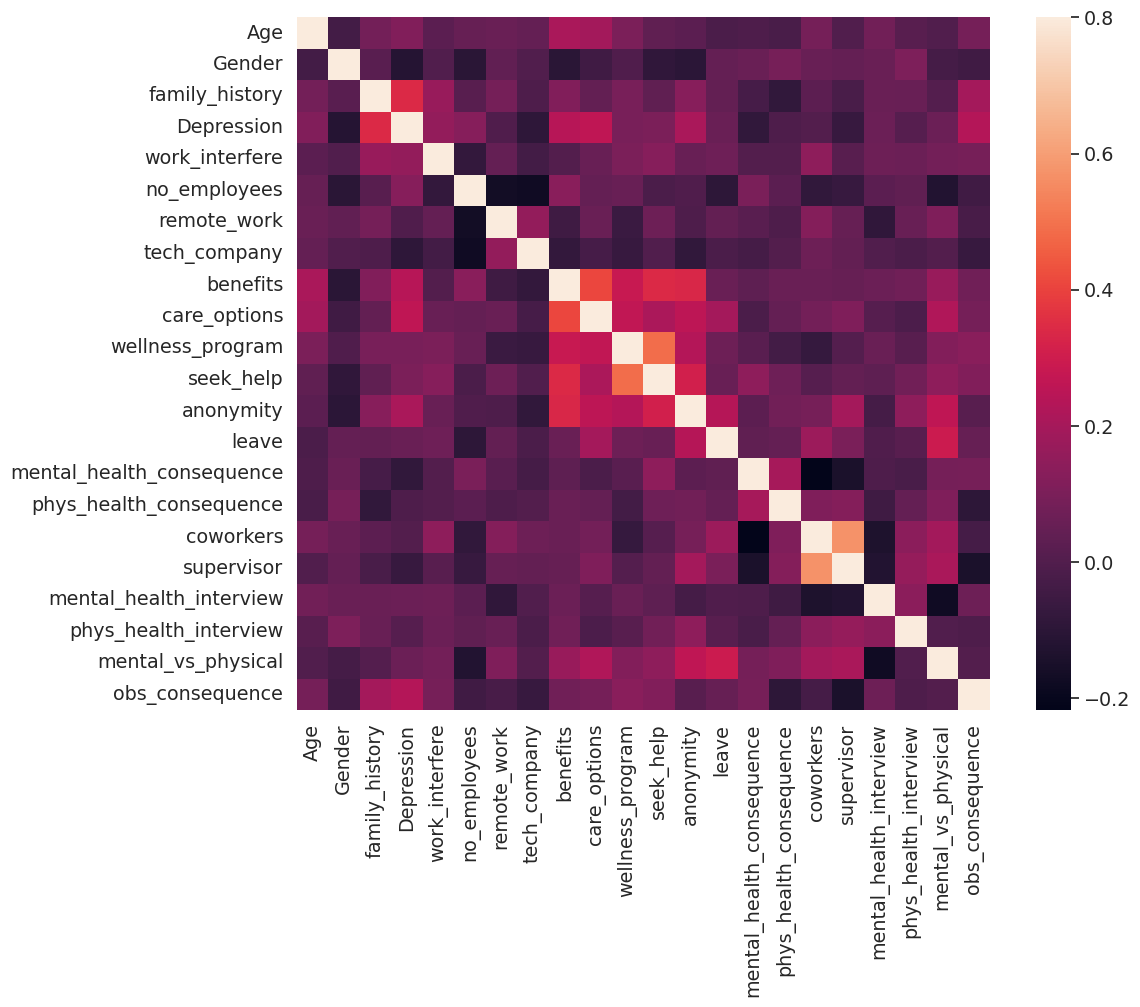

In [83]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

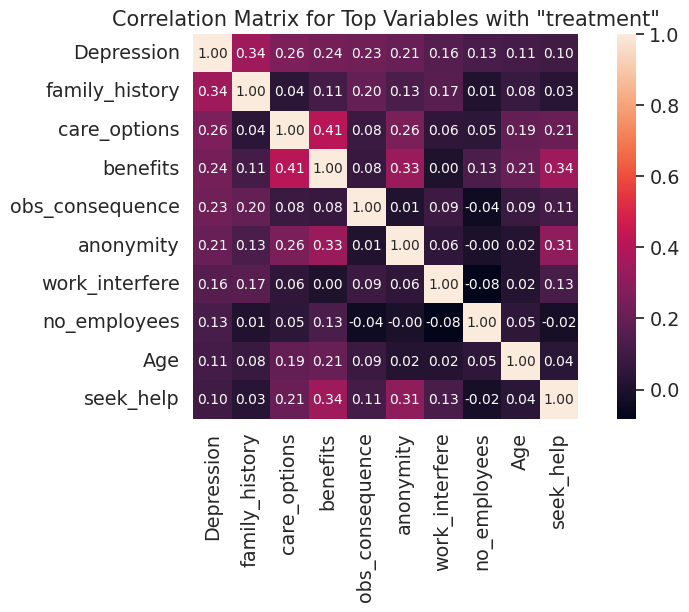

In [84]:
# Replace 'df' with your DataFrame if it's different
corrmat = df.corr()

# Number of variables for heatmap
k = 10

# Get the top correlated variables with 'treatment'
cols = corrmat.nlargest(k, 'Depression')['Depression'].index

# Calculate the correlation matrix for the selected variables
cm = np.corrcoef(df[cols].values.T)

# Set font scale for heatmap
sns.set(font_scale=1.25)

# Plot the heatmap
plt.figure(figsize=(10, 5))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix for Top Variables with "treatment"')
plt.show()

Justification:
Identification of Relevant Variables: By focusing on variables that are highly correlated with 'treatment', the heatmap provides a clear visual representation of which variables potentially have the strongest impact or relationship with the target variable.

Visual Interpretation: Heatmaps are effective for understanding complex relationships between multiple variables at once. Annotations (correlation coefficients) and color gradients help in quickly interpreting the strength and direction of correlations.

Insight Generation: This visualization aids in identifying multicollinearity (high correlations between predictors), which is crucial for feature selection and model building tasks in machine learning.

Customization for Clarity: Adjustments such as setting the font scale (sns.set(font_scale=1.25)) and formatting annotations (fmt='.2f') enhance readability and clarity of the heatmap.

Overall, this approach using seaborn (sns) and matplotlib (plt) libraries is effective for exploring correlations in data, making informed decisions about feature selection, and gaining insights into relationships within the dataset related to the 'treatment' variable.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.Depression

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Justification: The dataset is split into training and testing sets (80-20 split). The training set is used to train the model, and the testing set is used to evaluate its performance. The random_state ensures reproducibility.

In [86]:
param_grid = {
    'n_estimators': [20,60,100, 120],
    'max_depth': [2, 8,None],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': ['sqrt', 'log2']
}
print(param_grid)
rf=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV (estimator = rf,
                      param_grid = param_grid,
                      cv = 5,
                      verbose=2,
                      n_jobs = -1)


rf_grid.fit(X_train, y_train)

{'n_estimators': [20, 60, 100, 120], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'max_features': ['sqrt', 'log2']}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [87]:
# Print the best parameters and the corresponding recall score
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best recall score: {rf_grid.best_score_}")


Best parameters: {'max_depth': 8, 'max_features': 'log2', 'max_samples': 1.0, 'n_estimators': 60}
Best recall score: 0.7057354301572618


In [88]:
# Instantiate the RandomForestClassifier with the best hyperparameters
best_random_forest_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    max_samples=1.0,
    random_state=30
)


# # Train the model on the training data
best_random_forest_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_random_forest_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7758620689655172
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.81      0.72      0.76        29

    accuracy                           0.78        58
   macro avg       0.78      0.78      0.78        58
weighted avg       0.78      0.78      0.78        58



Interpretation: A recall of 0.83 for the "No" class means that 83% of the actual "No" depression cases were correctly identified by the model. This is a very high recall value, indicating that the model is very effective at identifying cases where the treatment is "No".

A recall of 0.72 for the "Yes" class means that 72% of the actual "Yes" depression cases were correctly identified by the model. This indicates that the model is reasonably good

The classification report shows an overall balanced performance with high precision and recall for both classes, although there is room for improvement in identifying "Yes" cases.

High Precision for "Yes" Class: Indicates few false positives. High Recall for "No" Class: Indicates few false negatives. Overall Accuracy: 84%, showing good performance. Balanced Macro and Weighted Averages: Both averages indicate balanced performance across classes, with slight room for improvement in detecting "Yes" cases.
Justification: A RandomForestClassifier is instantiated with specified hyperparameters. The model is then trained on the training data. The chosen hyperparameters are based on a previous grid search for the best parameters. The trained model is used to predict labels for the test set. The accuracy score and classification report (precision, recall, f1-score) are calculated to evaluate the model's performance.

In [53]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, cross_val_score


# Perform cross-validation
cv_scores = cross_val_score(best_random_forest_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy Scores: [0.68965517 0.67241379 0.70689655 0.68965517 0.71929825]
Mean Cross-Validation Accuracy: 0.6955837870538415


Cross-validation (5-fold) is performed to evaluate the model's performance across different subsets of the data. This provides a more robust estimate of the model's generalization performance compared to a single train-test split.

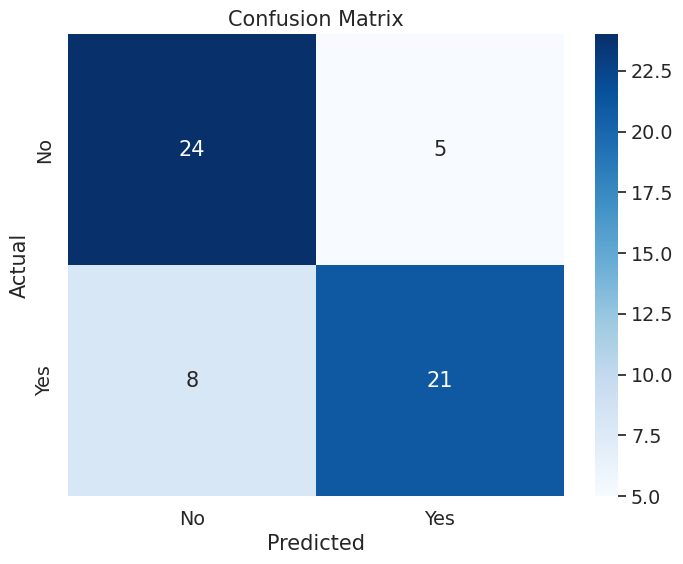

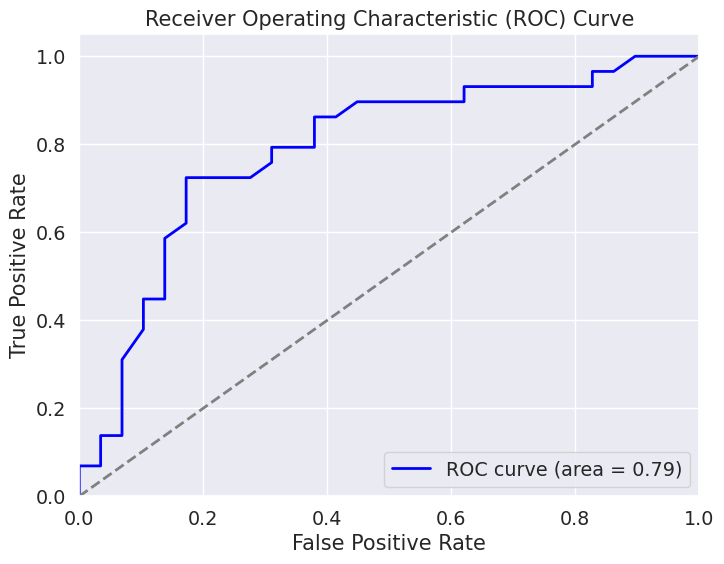

In [56]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Make predictions
y_pred = best_random_forest_model.predict(X_test)
y_prob = best_random_forest_model.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Interpretation:
High True Positives and True Negatives: The model correctly identifies many instances of both classes.
Moderate False Positives: The model has some false alarms (predicting "Yes" when it should be "No"), which could be acceptable depending on the context.
Moderate False Negatives: Missing out on some true "Yes" cases (predicting "No" when it should be "Yes"), which might be a concern depending on the application, as it indicates cases of depression being missed.
The confusion matrix and derived metrics suggest that the Random Forest model performs reasonably well but has room for improvement, particularly in reducing false negatives. Further tuning or different model approaches might help improve these metrics.



An ROC area (AUC-ROC) of 0.79 means that the model has good discriminative ability. In other words, there is a 79% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance. This suggests that the model is performing well, though there is still room for improvement.

The purpose of this project is to determine the likelihood of a person having depression based on various factors or variables.

**Ghun's Contributions:**
**Dataset Collection:**
Ghun gathered the dataset used for the project. This likely involved sourcing relevant data related to factors that influence depression.
Exploratory Data Analysis (EDA):

Ghun conducted comprehensive EDA on the collected dataset. This step involves understanding the structure of the data, identifying missing values, outliers, and exploring relationships between variables.

**Data Preparation**:
Prepared the data for modeling by splitting it into training and testing datasets. This step is crucial for evaluating the performance of machine learning models.

**Model Selection:**

Ghun decided on which machine learning model(s) to apply for predicting depression likelihood. This decision is based on the nature of the data and the project goals.
Random Forest Model Implementation:

**Implemented the Random Forest algorithm** as part of the modeling process.
Random Forest is a popular ensemble learning method known for its robustness and performance in classification tasks.
Hyperparameter Tuning:

Conducted **hyperparameter tuning** for the Random Forest model. This involves optimizing parameters to improve model accuracy and generalization.
GridSearchCV:

Utilized **GridSearchCV, a technique for hyperparameter tuning** that exhaustively searches through a specified parameter grid to determine the best parameters for the model.
Cross-Validation:

Implemented **cross-validation techniques** to evaluate model performance. Cross-validation helps in assessing how well the model generalizes to new data.
Interpretation of Results:

**Interpreted the findings from the model, analyzing the predictions** and drawing conclusions based on the insights gained from the data.

**Visualizing the dataset ** all its features on how are they affecting the target variable through histogram.

Also tried doing this with **logistic regression** model and visualizing it but it did not work as efficiently the random forest works.

                        
**Mahima's Contributions:**

Survey Design:

Mahima designed a Google Form questionnaire for data collection. This involved determining the questions to ask participants to gather relevant information related to depression.

Data Collection:

Collected responses from participants using the Google Form. This step involved reaching out to respondents and gathering data based on the questionnaire designed.

Concentrated on survey design and data collection.
And visualization through the confusion matrix and roc curve.
tried with other slight changes but didnt work as accuracy was low.

